<a href="https://colab.research.google.com/github/linoscjbis80-oss/python/blob/main/Pycaret_(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret 패키지 실행

In [ ]:
!pip install pycaret

  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [ ]:
!pip install pycaret[analysis]

^C


In [ ]:
from pycaret.utils.generic import enable_colab
enable_colab()

In [ ]:
import pandas as pd

# Pycaret의 'Credit' 데이터셋

In [ ]:
from pycaret.datasets import get_data
dataset=get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

# 'Credit' 데이터셋 전처리

In [ ]:
dataset.isnull().sum().sum()

0

In [ ]:
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(24000, 24)
(23976, 24)


In [ ]:
# 8 : 2로 train - test split.
data=dataset.sample(frac=0.8,random_state=231)
data_unseen=dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True,drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (19181, 24)
Unseen Data For Predictions: (4795, 24)


# Pycaret 세팅

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data=data,target="default",
            normalize=True,
            remove_multicollinearity=True, multicollinearity_threshold=0.9,
            bin_numeric_features=["LIMIT_BAL","AGE"]
            )

,Description,Value
0,Session id,4060
1,Target,default
2,Target type,Binary
3,Original data shape,"(19181, 24)"
4,Transformed data shape,"(19181, 19)"
5,Transformed train set shape,"(13426, 19)"
6,Transformed test set shape,"(5755, 19)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


## 성능이 좋은 'Top3' 모델


In [ ]:
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8219,0.7756,0.3608,0.6803,0.4709,0.3758,0.4035,2.7730
ada,Ada Boost Classifier,0.8199,0.7713,0.3347,0.6857,0.4495,0.3568,0.3898,0.8330
lightgbm,Light Gradient Boosting Machine,0.8196,0.7668,0.3591,0.6683,0.4666,0.3697,0.3959,2.1070
rf,Random Forest Classifier,0.8153,0.7491,0.3645,0.6414,0.4644,0.3629,0.3843,2.8280
lda,Linear Discriminant Analysis,0.8128,0.7152,0.2419,0.7265,0.3617,0.2830,0.3426,0.1160
lr,Logistic Regression,0.8117,0.7192,0.2297,0.7314,0.3484,0.2720,0.3353,0.9800
xgboost,Extreme Gradient Boosting,0.8101,0.7501,0.3513,0.6205,0.4482,0.3442,0.3646,0.5070
et,Extra Trees Classifier,0.8049,0.7280,0.3679,0.5912,0.4533,0.3424,0.3568,1.7000
ridge,Ridge Classifier,0.7988,0.7152,0.1264,0.7574,0.2163,0.1635,0.2526,0.1080
knn,K Neighbors Classifier,0.7970,0.6992,0.3509,0.5624,0.4316,0.3161,0.3294,0.3020


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
# top3 출력
print(top3)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4060, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4060), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
            

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Top3 모델 Create 및 하이퍼 파라미터 설정

In [ ]:
gbc =create_model('gbc',fold=5)
ada =create_model('ada',fold=5)
lgbm =create_model('lightgbm',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8198,0.7733,0.3570,0.6698,0.4658,0.3693,0.3958
1,0.8227,0.7685,0.3661,0.6792,0.4758,0.3804,0.4068
2,0.8220,0.7710,0.3644,0.6761,0.4736,0.3778,0.4040
3,0.8194,0.7650,0.3542,0.6677,0.4629,0.3664,0.3930
4,0.8235,0.7876,0.3587,0.6906,0.4722,0.3786,0.4080
Mean,0.8215,0.7731,0.3601,0.6767,0.4700,0.3745,0.4015
Std,0.0016,0.0078,0.0045,0.0081,0.0049,0.0056,0.0060


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8191,0.7689,0.3367,0.6792,0.4502,0.3563,0.3878
1,0.8231,0.7657,0.3475,0.6949,0.4633,0.3712,0.4032
2,0.8209,0.7676,0.3373,0.6886,0.4528,0.3604,0.3932
3,0.8190,0.7599,0.3356,0.6781,0.4490,0.3552,0.3867
4,0.8205,0.7824,0.3249,0.6982,0.4434,0.3530,0.3898
Mean,0.8205,0.7689,0.3364,0.6878,0.4517,0.3592,0.3921
Std,0.0015,0.0074,0.0072,0.0081,0.0065,0.0064,0.0060


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8161,0.7638,0.3452,0.6559,0.4523,0.3544,0.3808
1,0.8209,0.7690,0.3712,0.6657,0.4766,0.3789,0.4024
2,0.8186,0.7591,0.3610,0.6594,0.4666,0.3684,0.3927
3,0.8104,0.7580,0.3458,0.6239,0.4449,0.3418,0.3634
4,0.8197,0.7796,0.3536,0.6720,0.4634,0.3674,0.3948
Mean,0.8171,0.7659,0.3554,0.6554,0.4608,0.3622,0.3868
Std,0.0037,0.0079,0.0098,0.0167,0.0111,0.0128,0.0136


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Top3 모델 성능 개선하기

In [ ]:
tuned_gbc2 =tune_model(gbc,optimize='AUC') # auc를 가장 좋게 튜닝함
tuned_ada2 =tune_model(ada,optimize='AUC')
tuned_lgbm2 =tune_model(lgbm,optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7915,0.7921,0.0644,0.8261,0.1195,0.0906,0.1933
1,0.7848,0.7487,0.0339,0.7143,0.0647,0.0457,0.1226
2,0.7885,0.7648,0.0475,0.8235,0.0897,0.0674,0.1652
3,0.7923,0.7692,0.0576,0.9444,0.1086,0.0855,0.2040
4,0.7878,0.7480,0.0473,0.8235,0.0895,0.0671,0.1647
5,0.7841,0.7899,0.0338,0.7143,0.0645,0.0455,0.1223
6,0.7906,0.7695,0.0576,0.8500,0.1079,0.0823,0.1872
7,0.7832,0.7527,0.0373,0.6111,0.0703,0.0462,0.1102
8,0.7846,0.7931,0.0305,0.7500,0.0586,0.0422,0.1216


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8265,0.7930,0.3492,0.7153,0.4692,0.3799,0.4149
1,0.8116,0.7400,0.2780,0.6721,0.3933,0.3038,0.3455
2,0.8161,0.7732,0.3356,0.6600,0.4449,0.3485,0.3771
3,0.8206,0.7638,0.3153,0.7045,0.4356,0.3469,0.3867
4,0.8131,0.7472,0.3176,0.6573,0.4282,0.3324,0.3639
5,0.8228,0.7834,0.3277,0.7132,0.4491,0.3603,0.3991
6,0.8249,0.7667,0.3220,0.7308,0.4471,0.3611,0.4041
7,0.8100,0.7581,0.2983,0.6471,0.4084,0.3131,0.3464
8,0.8137,0.7921,0.3220,0.6552,0.4318,0.3356,0.3659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8206,0.7910,0.2915,0.7288,0.4165,0.3327,0.3817
1,0.8057,0.7483,0.2305,0.6667,0.3426,0.2589,0.3095
2,0.8146,0.7670,0.2780,0.6949,0.3971,0.3106,0.3563
3,0.8146,0.7765,0.2542,0.7212,0.3759,0.2952,0.3509
4,0.8079,0.7512,0.2500,0.6727,0.3645,0.2783,0.3259
5,0.8191,0.7928,0.2601,0.7624,0.3879,0.3106,0.3729
6,0.8197,0.7692,0.2678,0.7524,0.3950,0.3161,0.3747
7,0.8122,0.7596,0.2610,0.6937,0.3793,0.2945,0.3436
8,0.8167,0.7898,0.2847,0.7059,0.4058,0.3198,0.3661


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# 튜닝 모델 blend

In [ ]:
blend_model = blend_models([tuned_gbc2, tuned_ada2, tuned_lgbm2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8295,0.7992,0.3661,0.7200,0.4854,0.3959,0.4285
1,0.8079,0.7508,0.2847,0.6412,0.3944,0.2998,0.3348
2,0.8176,0.7723,0.3593,0.6543,0.4639,0.3650,0.3888
3,0.8228,0.7756,0.3186,0.7176,0.4413,0.3541,0.3954
4,0.8146,0.7510,0.3412,0.6516,0.4479,0.3493,0.3758
5,0.8280,0.7939,0.3547,0.7241,0.4762,0.3874,0.4228
6,0.8249,0.7717,0.3390,0.7143,0.4598,0.3707,0.4075
7,0.8145,0.7682,0.3254,0.6575,0.4354,0.3392,0.3693
8,0.8174,0.7928,0.3492,0.6603,0.4568,0.3593,0.3857


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 모델 시각화

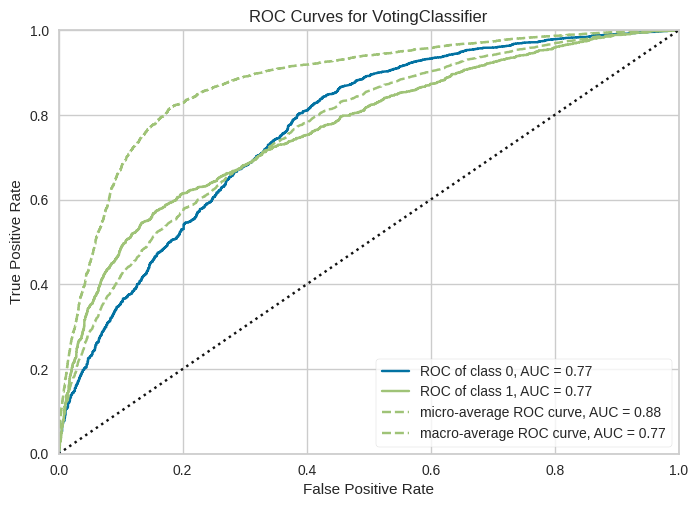

In [ ]:
# AUC Plot ## Area Under ROC-Curve
plot_model(blend_model, plot='auc')

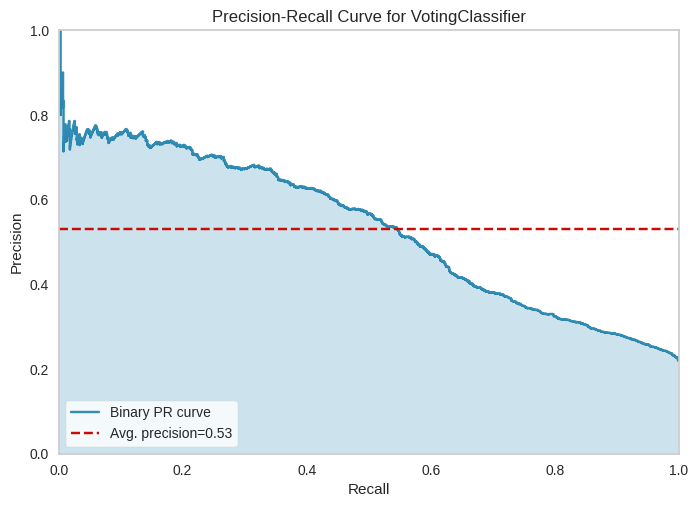

In [ ]:
plot_model(blend_model, plot='pr')

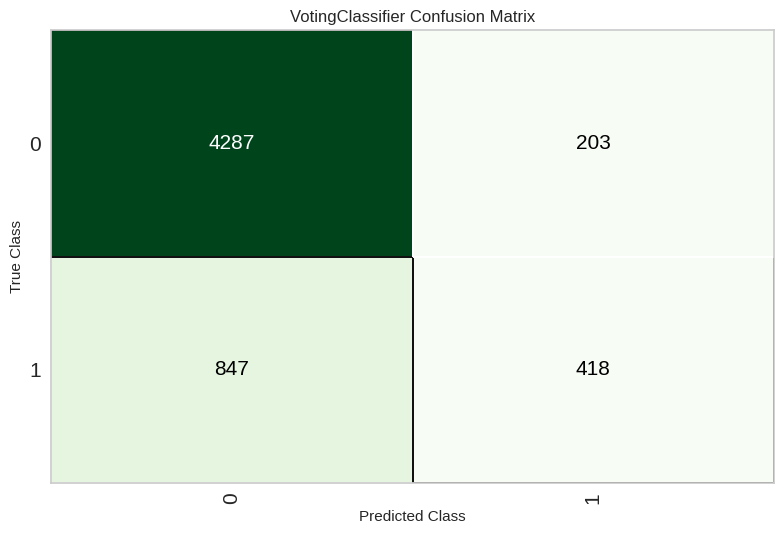

In [ ]:
plot_model(blend_model, plot='confusion_matrix')

## 모델 결정

In [ ]:
finalize_model=finalize_model(blend_model)

## 모델 Test

In [ ]:
# Test Dataset
unseen_prediction=predict_model(finalize_model,data=data_unseen)
unseen_prediction

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8215,0.7888,0.3506,0.7143,0.4703,0.3777,0.4123


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
0,90000,2,2,2,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0.7317
1,50000,1,1,2,37,0,0,0,0,0,...,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0,0.7311
2,320000,1,1,1,49,0,0,0,-1,-1,...,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0,0,0.7651
3,130000,2,3,2,39,0,0,0,0,0,...,930.0,3000.0,1537.0,1000.0,2000.0,930.0,33764.0,0,0,0.7593
4,60000,1,1,2,27,1,-2,-1,-1,-1,...,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1,0,0.6556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,360000,1,1,2,31,-1,-1,-1,0,0,...,1842.0,51.0,20007.0,1590.0,1000.0,1842.0,390.0,0,0,0.7648
4791,140000,1,2,1,32,0,0,0,0,0,...,136375.0,6300.0,6500.0,6300.0,6000.0,5200.0,5000.0,0,0,0.7636
4792,20000,1,2,2,34,0,0,0,0,0,...,12914.0,2000.0,2000.0,1000.0,5000.0,12914.0,600.0,0,0,0.7451
4793,20000,1,2,1,44,-2,-2,-2,-2,-2,...,1719.0,2890.0,2720.0,2890.0,9263.0,1824.0,1701.0,0,0,0.7594


In [ ]:
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["default"],
             unseen_prediction['prediction_label'],metric='Accuracy')

0.8215

In [ ]:
# AUC
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["default"],
             unseen_prediction['prediction_label'],metric='AUC')

0.6548

In [ ]:
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["default"],
             unseen_prediction['prediction_label'],metric='Recall')

0.3506

In [ ]:
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["default"],
             unseen_prediction['prediction_label'],metric='Kappa')

0.3777

In [ ]:
from pycaret.utils.generic import check_metric
check_metric(unseen_prediction["default"],
             unseen_prediction['prediction_label'],metric='Precision')

0.7143